In [1]:
# Copyright (c) Fulan Li.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [26]:
import os
os.listdir("to3/")

['s01.npy',
 's02.npy',
 's03.npy',
 's04.npy',
 's05.npy',
 's06.npy',
 's07.npy',
 's08.npy',
 's09.npy',
 's10.npy',
 's11.npy',
 's12.npy',
 's13.npy',
 's14.npy',
 's15.npy',
 's16.npy',
 's17.npy',
 's18.npy',
 's19.npy',
 's20.npy',
 's21.npy',
 's22.npy']

In [3]:
'''
In DEAP dataset, sensor PPG for each partcipant is stored in "s[participand ID].npy".
There are 22 participants and 40 videos for each participant. That's why there are 22 .npy files and each with the shape (40,sequence_length)
Adjust code as needed for other dataset
'''
a=np.load("to3/s03.npy")

In [4]:
a=a/a.max()

In [5]:
a.shape

(40, 8064)

In [6]:
def filtppg(dat):
    fdat = np.fft.rfft(dat)
    fdat[:45] = 0
    rdat = np.fft.irfft(fdat).real
    return rdat#/rdat.std()

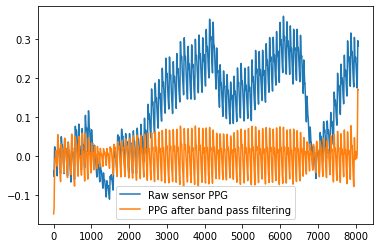

In [7]:
plt.plot(a[1],label = "Raw sensor PPG")
plt.plot(filtppg(a[1]),label ="PPG after band pass filtering")
plt.legend()
plt.show()

In [8]:
totallabel = np.zeros((22,40,8064))

In [9]:
totallabel.shape

(22, 40, 8064)

In [10]:
for i in range(1,23):
    ta=np.load("to3/s"+str(i).zfill(2)+".npy")
    for j in range(40):
        totallabel[i-1,j,:]=filtppg(ta[j])

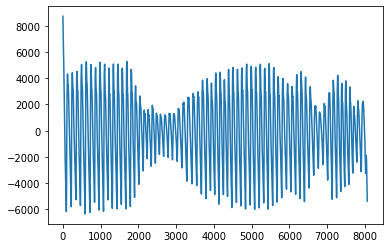

In [13]:
plt.plot(totallabel[0,0])

In [14]:
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks


In [15]:
#perform convertion
def createg(peaks,data):
    sampnum = 100
    fin = np.zeros((len(peaks),sampnum))
    for i in range(len(peaks)):
        tempd = data[peaks[i]:peaks[i+1]+1]
        tinterp = np.interp(np.arange(sampnum)*len(tempd)/sampnum, np.arange(len(tempd)), tempd)
        tinterp = tinterp - np.arange(sampnum)*(tinterp[-1]-tinterp[0])/(sampnum-1)
        tinterp = tinterp - tinterp[0]
        tinterp = tinterp/tinterp.mean()
        fin[i,:] = tinterp
    return fin
def tosignature(dat):
    peaks, _ = find_peaks(-dat, height=0,distance=80)
    '''fig = go.Figure()
    fig.add_trace(go.Scatter(y=dat))
    fig.add_trace(go.Scatter(x=peaks,y=dat[peaks],mode="markers"))
    fig.show()'''
    return createg(peaks,dat)
def nordat(data):
    peaks, _ = find_peaks(-data, height=0,distance=80)
    fin = np.zeros(len(data))
    for i in range(len(peaks)-1):
        tempd = data[peaks[i]:peaks[i+1]+1]
        templen = len(tempd)
        tempd = tempd - np.arange(templen)*(tempd[-1]-tempd[0])/(templen-1)
        tempd = tempd - tempd[0]
        tempd = tempd/tempd.mean()
        fin[peaks[i]:peaks[i+1]+1] = tempd
    return fin

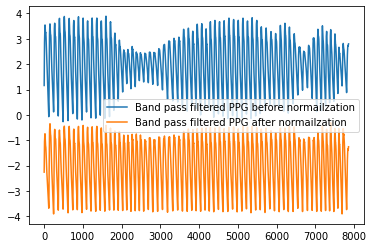

In [19]:
oridat = filtppg(totallabel[0,0])
noreddat = filtppg(nordat(oridat))
plt.plot((oridat/oridat.std())[100:-110]+2,label="Band pass filtered PPG before normailzation")
plt.plot((noreddat/noreddat.std())[100:-110]-2,label="Band pass filtered PPG after normailzation")
plt.legend()
plt.show()

In [20]:
filtedtestl = np.zeros(totallabel.shape)
for i in range(22):
    for j in range(40):
        tempdat = filtppg(nordat(totallabel[i,j,:]))
        filtedtestl[i,j,:]=tempdat/tempdat.std()

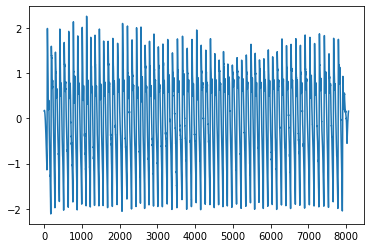

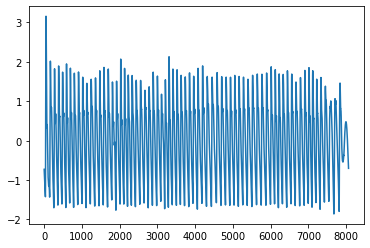

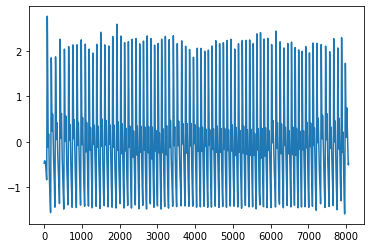

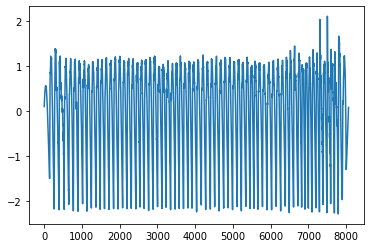

In [25]:
for i in range(4):
    a = np.random.randint(22)
    b = np.random.randint(40)
    
    plt.plot(filtedtestl[a,b])
    plt.show()

In [ ]:
np.save("normalized_label22_morefilt.npy",filtedtestl)